In [1]:
#Import modul
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import csv data ke pandas dataframe
df = pd.read_csv("E:/2.KULIAH/KP2_BBWS/DEBIT/tma_wonogiri.csv",header=None)

In [3]:
#Sorting dan reindexing
#colNaming
df.columns = ["DATE", "TIME", "OLD_VAL"]
#Menyatukan kolom DATE dan TIME
df["DATETIME"] = df["DATE"].map(str) + " " + df["TIME"]
#Menghapus kolom DATE & TIME
df.drop(["DATE","TIME"], axis=1, inplace=True)
#merubah urutan index
df = df.reindex(columns=["DATETIME", "OLD_VAL"])

#sorting berdasar datetime
df['DATETIME'] =  pd.to_datetime(df["DATETIME"], format='%Y-%m-%d %H:%M:%S')
df = df.sort_values(axis=0, ascending=True, by="DATETIME")
#reset index mulai dari 0
df = df.reset_index(drop=True)

In [4]:
print(df.describe())

          OLD_VAL
count  656.000000
mean   447.667683
std     41.834234
min     47.000000
25%    445.000000
50%    452.000000
75%    457.000000
max    465.000000


In [5]:
#mengubah dataframe ke bentuk list
dflist = df["OLD_VAL"].values
#mencari standar deviasi sebagai acuan perhitungan data anomali
deviasi = df["OLD_VAL"].std()

In [6]:
#deklarasi fungsi
def anomali(list_,std) :
	jumlahdata = len(list_)
	list_baru=[]
	for y in xrange(0,jumlahdata):
		anomali = True
		if y == 0 :
			#jika data merupakan data pertama
			while anomali == True :
				if (list_[y] < list_[y+1]-std) or (list_[y] > list_[y+1]+std) :
					#print("data anomali")
					if (list_[y+1] < list_[y+2]) : #-----------------------Jika perbandingan data setelahnya cenderung naik
						newdata = list_[y+1]-((list_[y+1]+list_[y+2])/2)
						list_baru.append(newdata)
					elif (list_[y+1] > list_[y+2]) : #---------------------Jika perbandingan data setelahnya cenderung turun
						newdata = list_[y+1]+((list_[y+1]+list_[y+2])/2)
						list_baru.append(newdata)
					else : #-------------------------------------------------Jika perbandingan data setelahnya sama
						newdata = list_[y+1]
						list_baru.append(newdata)
				else :
					#ubah_ke newdata
					list_baru.append(list_[y])
				anomali = False
		elif y == (jumlahdata-1) :
			#jika data merupakan data terakhir
			while anomali == True :
				if (list_[y] < list_[y-1]-std) or (list_[y] > list_[y-1]+std) :
					#print("data anomali")
					if (list_[y-2] < list_[y-1]) : #-----------------------Jika perbandingan data setelahnya cenderung naik
						newdata = list_[y-1]+((list_[y-1]+list_[y-2])/2)
						list_baru.append(newdata)
					elif (list_[y-2] > list_[y-1]) : #---------------------Jika perbandingan data setelahnya cenderung turun
						newdata = list_[y-1]-((list_[y-1]+list_[y-2])/2)
						list_baru.append(newdata)
					else : #-------------------------------------------------Jika perbandingan data setelahnya sama
						newdata = list_[y+1]
						list_baru.append(newdata)
				else :
					#ubah_ke newdata
					list_baru.append(list_[y])
				anomali = False
		else :
			#Jika data bukan data pertama dan terakhir
			while anomali == True :
				if ((list_[y] < list_[y-1]-std) and (list_[y] < list_[y+1]-std)) or ((list_[y] > list_[y-1]+std) and (list_[y] > list_[y+1]+std)) :
					#print("data anomali")
					newdata = (list_[y-1]+list_[y+1])/2
					list_baru.append(newdata)
				else :
					#ubah_ke newdata
					list_baru.append(list_[y])
				anomali = False
	return list_baru

In [7]:
#deklarasi list baru
list_br = anomali(dflist,deviasi)

In [8]:
#penambahan kolom baru ke pandas dataframe
df["NEW_VAL"] = list_br

In [9]:
print(df.describe())

          OLD_VAL     NEW_VAL
count  656.000000  656.000000
mean   447.667683  451.951220
std     41.834234    6.875162
min     47.000000  440.000000
25%    445.000000  446.000000
50%    452.000000  452.000000
75%    457.000000  458.000000
max    465.000000  465.000000


In [10]:
#Membagi Dataframe kedalam ukuran yang lebih kecil
n = 50  #ukuran satu dataframe
list_df = [df[i:i+n] for i in range(0,df.shape[0],n)] #pembagian dataframe
#akses setiap list_dataframe : list_df[bagian]

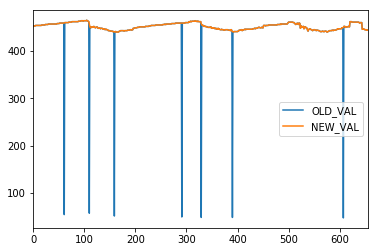

In [11]:
#Visualisasi
%matplotlib inline
df.plot.line()

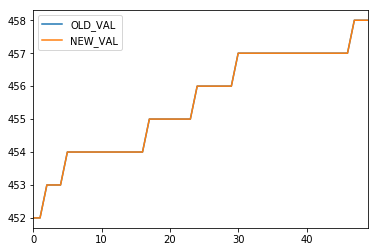

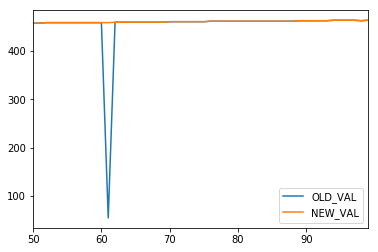

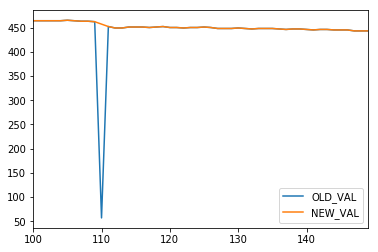

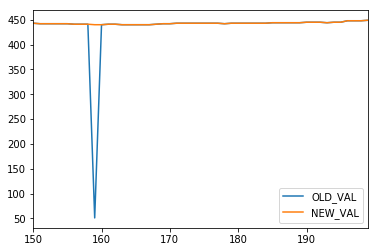

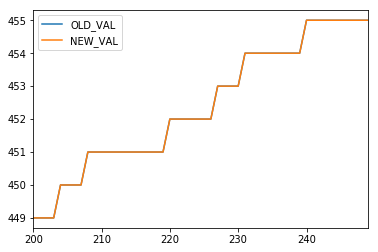

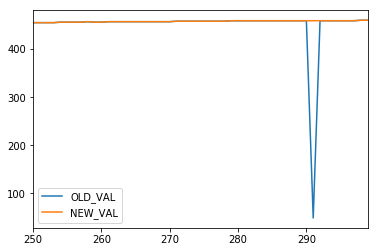

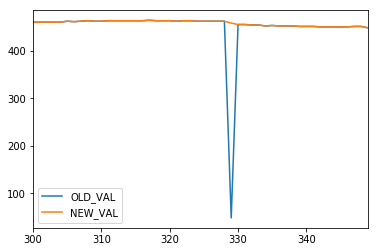

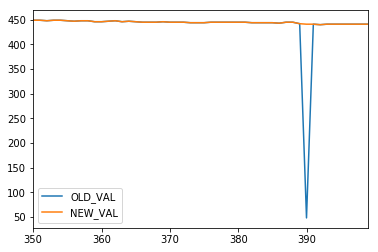

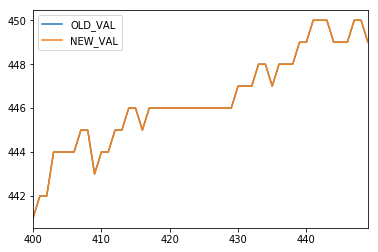

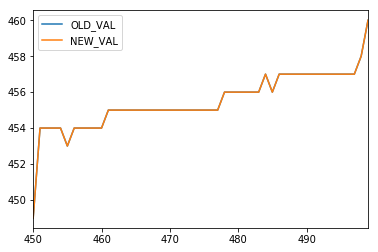

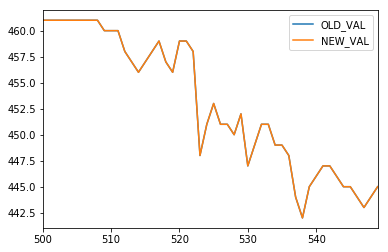

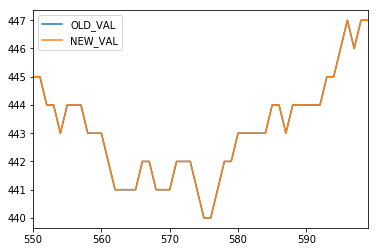

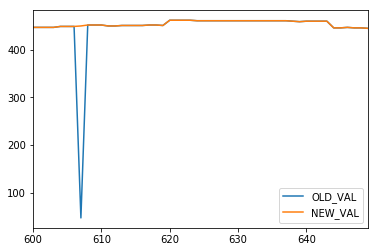

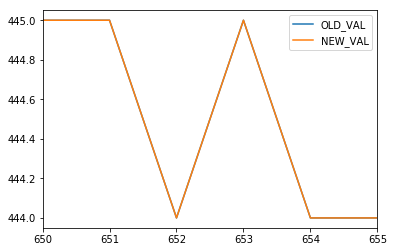

In [12]:
#show
for x in xrange(0,(len(df)/n)+1):
    list_df[x].plot.line()

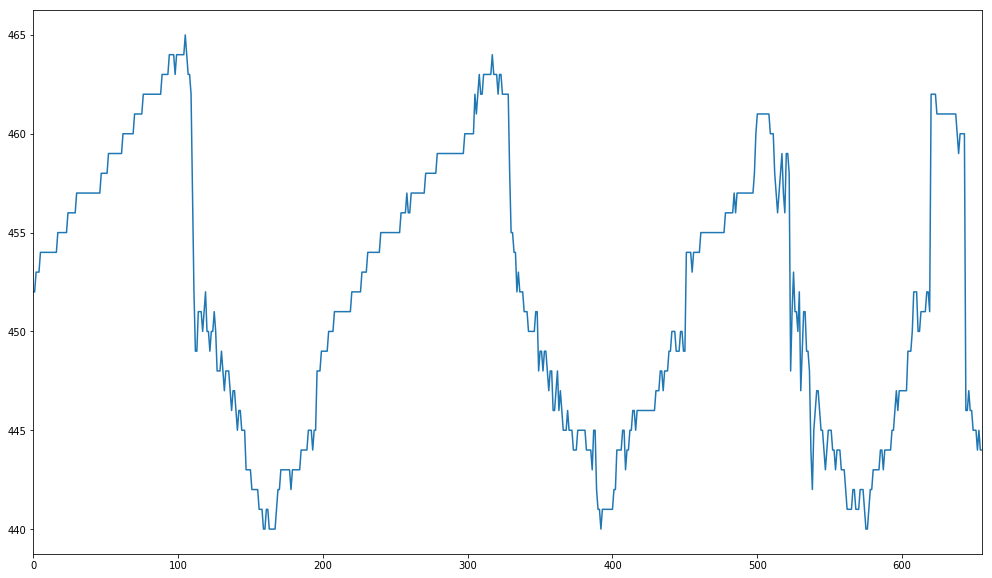

In [13]:
plt.figure(figsize=(17,10))
df['NEW_VAL'].plot(kind='line')